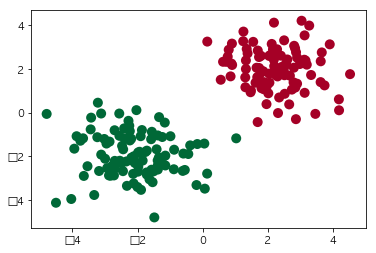

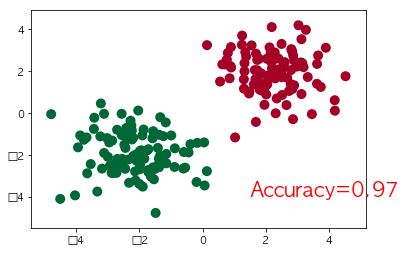

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 텐서플로우 랜덤 시드 설정.
tf.set_random_seed(1)

# 넘파이 랜덤 시드 설정.
np.random.seed(1)

# 더미 데이터 생성.
x0 = np.random.normal(2, 1, size=(100,2))      # class0 x shape=(100, 2)
y0 = np.zeros(100)                             # class0 y shape=(100, 1)
x1 = np.random.normal(-2, 1, size=(100,2))     # class1 x shape=(100, 2)
y1 = np.ones(100)                              # class1 y shape=(100, 1)
x = np.vstack((x0, x1))  # 매트릭스를 수직으로 병합 / shape (200, 2) + some noise
y = np.hstack((y0, y1))  # 매트릭스를 수직으로 병합 / shape (200, )

# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)     # placeholder타입 input x 선언.
tf_y = tf.placeholder(tf.int32, y.shape)     # placeholder타입 input y 선언.

# 신경망 layer 생성.
# 입력을 tf_x로 받고 node의 갯수가 10개, activation function은 relu를 사용.
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
output = tf.layers.dense(l1, 2)                     # output layer

# loss를 cross_entropy함수로 계산.
# https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression 참조.
loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)           # cost를 계산

# 정확도와 update_op를 반환.
accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]

# optimizer생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

# loss를 최소화하는 방향으로 train_op 생성.
train_op = optimizer.minimize(loss)

sess = tf.Session()                                                                 # control training and others

# global local변수 초기화.
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)     # initialize var in graph

plt.ion()   # 차트 그리기 시작.
plt.show()
for step in range(100):
    # 출력값을 이용하여 학습.
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step % 2 == 0:
        # 학습과정을 보여준다.
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()